In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "Consultrix Data Set.csv"  # Change file path as needed
df = pd.read_csv(file_path)

In [3]:
df

,tier,city,literacy_rate(in %),Average_Anuual_income,average_disposable_income,family_size,population,age_group_0_18,age_group_18_35,age_group_35_50,age_group_50+,no_of_diabetic_patients,no_of_cardiovascular_patients,no_of_chemists,internet_connectivity
0,2,Aaryanagar,83,265871,191427.12,5,1666970,250045.50,333394.00,600109.20,483421.30,150027.30,66678.80,5505,Good
1,3,Adityanagar,68,194992,154043.68,5,580556,69666.72,116111.20,209000.16,185777.92,63861.16,40638.92,1712,Bad
2,3,Ambeyar,76,270875,208573.75,5,300512,42071.68,72122.88,105179.20,81138.24,36061.44,15025.60,2228,Bad
3,3,Amritgram,67,249680,187260.00,4,608333,109499.94,145999.92,231166.54,121666.60,66916.63,12166.66,2555,Medium
4,2,anandvan,84,311603,221238.13,5,4376002,481360.22,1269040.58,1619120.74,1006480.46,437600.20,306320.14,5883,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3,Vijayapuri,70,150123,108088.56,4,230487,32268.18,36877.92,78365.58,82975.32,23048.70,11524.35,1587,Bad
126,2,Vikramgarh,88,253982,190486.50,3,6806659,748732.49,1429398.39,2178130.88,2450397.24,612599.31,272266.36,7521,Good
127,2,Vishwapuri,81,301934,217392.48,4,2005739,200573.90,601721.70,722066.04,481377.36,160459.12,80229.56,7070,Good
128,3,Wanyar,80,252887,199780.73,4,669395,100409.25,120491.10,267758.00,180736.65,80327.40,33469.75,2690,Medium


In [4]:
### DATA CLEANING ###

# Standardizing column names (removing spaces and converting to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Checking for missing values and filling with median values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Handling incorrect data types
df['tier'] = df['tier'].astype(int)  # Ensuring tier is an integer
df['city'] = df['city'].astype(str)  # Ensuring city names are strings

# Removing duplicates (if any)
df.drop_duplicates(inplace=True)

In [5]:
# Removing outliers using IQR for income data
Q1 = df["average_anuual_income"].quantile(0.25)
Q3 = df["average_anuual_income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["average_anuual_income"] >= lower_bound) & (df["average_anuual_income"] <= upper_bound)]

In [6]:
# Replacing inconsistent internet connectivity labels
'''df['internet_connectivity'] = df['internet_connectivity'].str.lower().replace({
    "bad": "Poor",
    "medium": "Moderate",
    "good": "Good"
})'''
# Encoding categorical variables
df["internet_connectivity"] = df["internet_connectivity"].astype("category")

/var/folders/5g/fbwlmn991nzchvvmf5vs5f880000gn/T/ipykernel_32027/3789764201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["internet_connectivity"] = df["internet_connectivity"].astype("category")


In [7]:
# Display cleaned data summary
# Save cleaned dataset
cleaned_file_path = "Cleaned_Consultrix_Data.csv"
df.to_csv(cleaned_file_path, index=False)
print("Cleaned Data Summary:")
print(df.info())

Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tier                           124 non-null    int64   
 1   city                           124 non-null    object  
 2   literacy_rate(in_%)            124 non-null    int64   
 3   average_anuual_income          124 non-null    int64   
 4   average_disposable_income      124 non-null    float64 
 5   family_size                    124 non-null    int64   
 6   population                     124 non-null    int64   
 7   age_group_0_18                 124 non-null    float64 
 8   age_group_18_35                124 non-null    float64 
 9   age_group_35_50                124 non-null    float64 
 10  age_group_50+                  124 non-null    float64 
 11  no_of_diabetic_patients        124 non-null    float64 
 12  no_of_cardiovascula

In [8]:
### VISUALIZATIONS ###

# Group data for insights
tier_summary = df.groupby("tier").agg({
    "literacy_rate(in_%)": "mean",
    "average_anuual_income": "mean",
    "average_disposable_income": "mean",
    "population": "sum",
    "no_of_diabetic_patients": "sum",
    "no_of_cardiovascular_patients": "sum",
    "internet_connectivity": lambda x: x.value_counts().idxmax()  # Most common category
}).reset_index()

In [9]:
# ---- Data Visualization: Pie Charts, Bar Graphs, and Line Plots ----

In [37]:
# Function to generate labels with category name + count
def generate_labels(data):
    return [f"{label} ({count})" for label, count in zip(data.index, data)]

def text_formatting(text, autotext):
    for texts in text:
        text

# Define distinct colors for internet connectivity (Ensure keys match formatted labels)
colors_connectivity = {
    "Poor": "#725438",        # Brown
    "Moderate": "#cd402a",    # Red
    "Good": "#1e044a"         # Dark Blue
}

# ---- Create a 2x2 Figure Layout ----
fig, axes = plt.subplots(2, 2, figsize=(6,6))

# ---- Subplot 1: Overall Internet Connectivity Distribution ----
internet_pie = df["internet_connectivity"].str.strip().str.title().value_counts()
wedges, texts, autotexts = axes[0, 0].pie(
    internet_pie, 
    labels=generate_labels(internet_pie),  
    autopct='%1.1f%%', 
    colors=["#1e044a", "#cd402a", "#725438"]
)

for text in texts:
    text.set_color("black")
    text.set_fontsize(8)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)

axes[0, 0].set_title("Internet Connectivity Distribution", fontsize = 8)

# ---- Subplot 2: Tier 1 Internet Connectivity ----
tier_1 = df[df["tier"] == 1]["internet_connectivity"].str.strip().str.title().value_counts()
wedges, texts, autotexts = axes[0, 1].pie(
    tier_1, 
    labels=generate_labels(tier_1),  
    autopct='%1.1f%%', 
    colors=[colors_connectivity[label] for label in tier_1.index]
)

for text in texts:
    text.set_color("black")
    text.set_fontsize(8)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)

axes[0, 1].set_title("Internet Connectivity in Tier 1", fontsize = 8)

# ---- Subplot 3: Tier 2 Internet Connectivity ----
tier_2 = df[df["tier"] == 2]["internet_connectivity"].str.strip().str.title().value_counts()
wedges, texts, autotexts = axes[1, 0].pie(
    tier_2, 
    labels=generate_labels(tier_2),  
    autopct='%1.1f%%', 
    colors=[colors_connectivity[label] for label in tier_2.index]
)

for text in texts:
    text.set_color("black")
    text.set_fontsize(8)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)

axes[1, 0].set_title("Internet Connectivity in Tier 2", fontsize = 8)

# ---- Subplot 4: Tier 3 Internet Connectivity ----
tier_3 = df[df["tier"] == 3]["internet_connectivity"].str.strip().str.title().value_counts()
wedges, texts, autotexts = axes[1, 1].pie(
    tier_3, 
    labels=generate_labels(tier_3),  
    autopct='%1.1f%%', 
    colors=[colors_connectivity[label] for label in tier_3.index]
)

for text in texts:
    text.set_color("black")
    text.set_fontsize(8)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)

axes[1, 1].set_title("Internet Connectivity in Tier 3", fontsize = 8)

# Adjust layout
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after function definition on line 5 (1397014107.py, line 8)

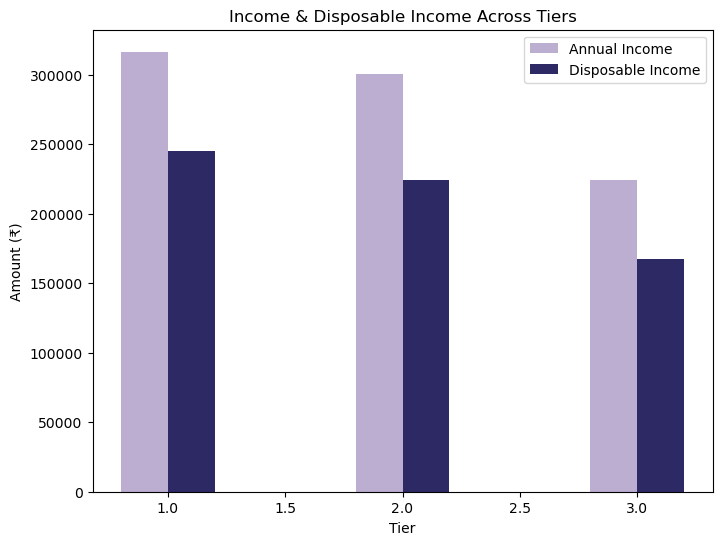

In [52]:
# ---- Bar Graph: Income and Disposable Income Comparison ----
plt.figure(figsize=(8, 6))
tier_summary = df.groupby("tier").agg({
    "average_anuual_income": "mean",
    "average_disposable_income": "mean",
    "population": "sum",
    "no_of_diabetic_patients": "sum",
    "no_of_cardiovascular_patients": "sum"
}).reset_index()

plt.bar(tier_summary["tier"] - 0.1, tier_summary["average_anuual_income"], width=0.2, label="Annual Income", color="#bcaed1")
plt.bar(tier_summary["tier"] + 0.1, tier_summary["average_disposable_income"], width=0.2, label="Disposable Income", color="#2d2965")
plt.title("Income & Disposable Income Across Tiers")
plt.xlabel("Tier")
plt.ylabel("Amount (₹)")
plt.legend()
plt.show()

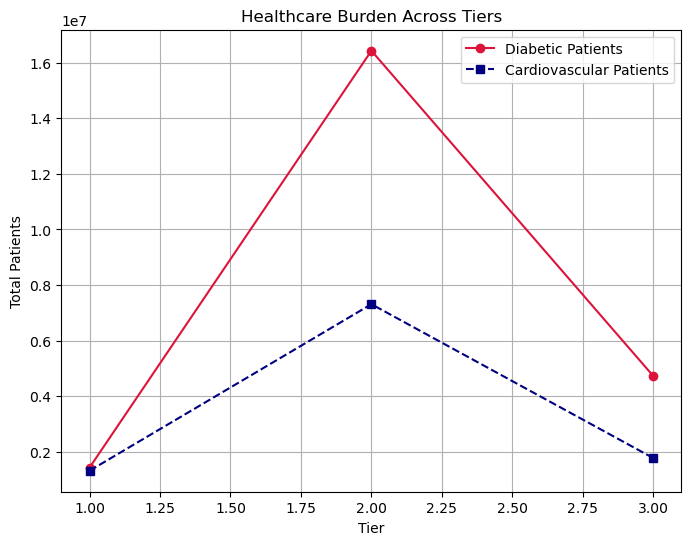

In [40]:
# ---- Line Plot: Healthcare Burden Over Tiers ----
plt.figure(figsize=(8, 6))
plt.plot(tier_summary["tier"], tier_summary["no_of_diabetic_patients"], marker="o", linestyle="-", color="crimson", label="Diabetic Patients")
plt.plot(tier_summary["tier"], tier_summary["no_of_cardiovascular_patients"], marker="s", linestyle="--", color="navy", label="Cardiovascular Patients")
plt.title("Healthcare Burden Across Tiers")
plt.xlabel("Tier")
plt.ylabel("Total Patients")
plt.grid()
plt.legend()
plt.show()

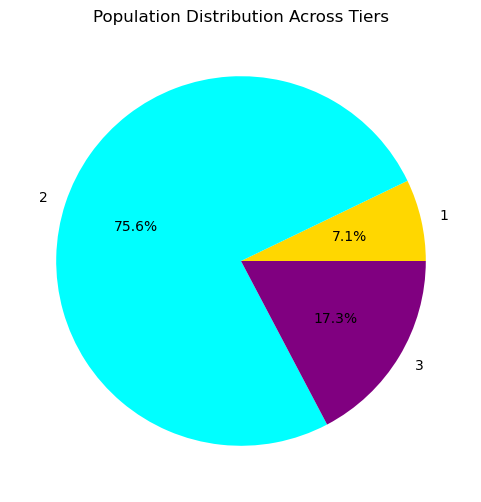

In [41]:
# ---- Pie Chart: Population Distribution Across Tiers ----
plt.figure(figsize=(6, 6))
population_pie = tier_summary.set_index("tier")["population"]
plt.pie(population_pie, labels=population_pie.index, autopct='%1.1f%%', colors=["gold", "cyan", "purple"])
plt.title("Population Distribution Across Tiers")
plt.show()